In [21]:
#### Agglomeration of communities ####

import pandas as pd 
import os 
from datetime import datetime 
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

import numpy as np

In [22]:
cwd = os.getcwd()
input_path = f"{cwd}/Data/frequencies/"

output_path = f"{cwd}/Data/frequencies/"

groups = ['MOC2_CCR2KO', 'MOC2_WT']
group = groups[0]
date = datetime.now().strftime("%Y%m%d")

# celldata = pd.read_csv(f"{input_path}{group}_celldata_{date}.csv")
KO = pd.read_csv(f"{input_path}freqs_{group}_25px_20240307.csv")
# WT = pd.read_csv(f"{input_path}freqs_{groups[1]}_25px_20240307.csv")


In [23]:

# date = datetime.now().strftime("%Y%m%d")

# Find datafile
# file_wt = 'Rphenograph_CRICK_WT_output_170clusters_k250_12ct_fractions.csv'
file_ko = 'Rphenograph_CRICK_CCR2KO_output_190clusters_k250_12ct_fractions.csv' 
# pi = pd.read_excel('Data/raw/LUAD Clinical Data.xlsx')

# Get current directory
current_directory = os.getcwd()
data_path = current_directory + '/Data/'

# Set path 
output_dir = f"{data_path}/clustering/agglomerate_communities_python/"


data_wt = pd.read_csv(f"{data_path}clustering/{file_ko}", index_col=0)

In [24]:
data_wt

,Unique_ROI_ID,source_ID,source_cluster,Dendritic.cells,Endothelium.Thy1.,Endothelium.Thy1..1,Fibroblasts,Macrophages.CD68,Macrophages.F480,Neutrophils,T.cell.CD8,T.cell.regulatory,Tumour,Undefined,cDC1.Dendritic.cells,cluster
1,MOC2_CCR2KO_1B_3_11,1,Endothelium Thy1+,0.0,0.400000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.0,0.0,1
2,MOC2_CCR2KO_1B_3_11,2,Endothelium Thy1+,0.0,0.909091,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.090909,0.0,0.0,2
3,MOC2_CCR2KO_1B_3_11,3,Endothelium Thy1+,0.0,0.800000,0.0,0.0,0.200000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,3
4,MOC2_CCR2KO_1B_3_11,4,Endothelium Thy1+,0.0,0.750000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.250000,0.0,0.0,4
5,MOC2_CCR2KO_1B_3_11,5,Endothelium Thy1+,0.0,0.416667,0.0,0.0,0.083333,0.0,0.083333,0.166667,0.0,0.250000,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348807,MOC2_CCR2KO_NM_1_16,80728,Tumour,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.0,30
348808,MOC2_CCR2KO_NM_1_16,80729,Tumour,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.0,30
348809,MOC2_CCR2KO_NM_1_16,80730,Macrophages CD68,0.0,0.000000,0.0,0.0,0.111111,0.0,0.000000,0.000000,0.0,0.888889,0.0,0.0,132
348810,MOC2_CCR2KO_NM_1_16,80731,Tumour,0.0,0.000000,0.0,0.0,0.500000,0.0,0.000000,0.000000,0.0,0.500000,0.0,0.0,14


In [25]:
# match cell type names in colummns and rows

# Rows
replacement_map = {'Endothelium Thy1+':'Endothelium_thy1_high',
       'T cell CD8':'Tcell_CD8', 'Macrophages CD68':'Macrophage_CD68', 'Dendritic cells':'DCs',
       'cDC1 Dendritic cells':'cDC1_DCs', 'T cell regulatory':'Treg', 'Macrophages F480':'Macrophage_F480',
       'Endothelium Thy1-':'Endothelium_thy1_low'}
data_wt['source_cluster'] = data_wt['source_cluster'].replace(replacement_map)
data_wt['source_cluster'].unique()

# Columns
new_column_names = {'Dendritic.cells':'DCs',
       'Endothelium.Thy1.':'Endothelium_thy1_high', 'Endothelium.Thy1..1':'Endothelium_thy1_low',
       'Macrophages.CD68':'Macrophage_CD68', 'Macrophages.F480':'Macrophage_F480', 'T.cell.CD8':'Tcell_CD8',
       'T.cell.regulatory':'Treg', 'cDC1.Dendritic.cells':'cDC1_DCs'}
data_wt = data_wt.rename(columns=new_column_names)
data_wt.columns

df = data_wt.iloc[:,3:]
data_wt.columns

Index(['Unique_ROI_ID', 'source_ID', 'source_cluster', 'DCs',
       'Endothelium_thy1_high', 'Endothelium_thy1_low', 'Fibroblasts',
       'Macrophage_CD68', 'Macrophage_F480', 'Neutrophils', 'Tcell_CD8',
       'Treg', 'Tumour', 'Undefined', 'cDC1_DCs', 'cluster'],
      dtype='object')

In [26]:
df.columns

Index(['DCs', 'Endothelium_thy1_high', 'Endothelium_thy1_low', 'Fibroblasts',
       'Macrophage_CD68', 'Macrophage_F480', 'Neutrophils', 'Tcell_CD8',
       'Treg', 'Tumour', 'Undefined', 'cDC1_DCs', 'cluster'],
      dtype='object')

In [27]:
#### Agglomerative clustering function ####

def agglomerative_clustering(k, average_neighbours, avg_noCluster, agglomerate_to):
    
    # Agglomerative clustering to chosen number of communities as determined by own biological knowledge of the data
    ac1 = AgglomerativeClustering(linkage = 'average', n_clusters = agglomerate_to)
    agglomerate1 = pd.DataFrame(ac1.fit_predict(avg_noCluster))
    # Rename column
    agglomerate1.columns = [f"agglomerateto_{agglomerate_to}"]
    agglomerate1[f"agglomerateto_{agglomerate_to}"] += 1
    # Add agglomerated data to average neighbours 
    average_neighbours = average_neighbours.join(agglomerate1)
   
    print(list(average_neighbours))
    
    # Save data with added columns 
    average_neighbours.to_csv(f"{data_path}clustering/reclustered_{agglomerate_to}_{group}.csv", index = False)
    print('dataset saved')

    return pd.DataFrame(average_neighbours)

In [28]:
colors = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#42d4f4', '#f032e6', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#000075', '#a9a9a9', '#000000']
cts = ['DCs', 'Endothelium_thy1_high', 'Endothelium_thy1_low', 'Fibroblasts',
       'Macrophage_CD68', 'Macrophage_F480', 'Neutrophils', 'Tcell_CD8',
       'Treg', 'Tumour', 'Undefined', 'cDC1_DCs']
# colors = ['blue', 'orange', 'green', 'red', 'purple', 'maroon', 'pink', 'gray', 'yellow', 'cyan', 'magenta', 'olive', 'brown', 'navy', 'aqua', 'teal']


In [29]:
# Create average_neighbours
centroid_noclus = df.groupby('cluster').mean()
centroids = centroid_noclus.reset_index()
# centroid_noclus = cluster_centroids.drop('cluster')
print(centroid_noclus.shape)
centroid_noclus
# centroids

(190, 12)


,DCs,Endothelium_thy1_high,Endothelium_thy1_low,Fibroblasts,Macrophage_CD68,Macrophage_F480,Neutrophils,Tcell_CD8,Treg,Tumour,Undefined,cDC1_DCs
cluster,,,,,,,,,,,,
1,0.000327,0.397831,0.000942,0.001199,0.000000,0.000147,0.001172,0.001796,0.000549,0.594051,0.001621,0.000365
2,0.000787,0.874997,0.000359,0.000398,0.000028,0.000982,0.000315,0.000074,0.000767,0.119214,0.000069,0.002009
3,0.012131,0.390473,0.033333,0.009539,0.233964,0.016561,0.013916,0.019309,0.052281,0.207832,0.007516,0.003145
4,0.000887,0.594872,0.001236,0.009595,0.004031,0.001248,0.003240,0.024010,0.001236,0.356727,0.001065,0.001852
5,0.000012,0.999955,0.000000,0.000000,0.000000,0.000011,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
186,0.000099,0.000424,0.000424,0.000157,0.000041,0.000085,0.890459,0.000000,0.000169,0.107346,0.000620,0.000175
187,0.000368,0.000876,0.000000,0.000846,0.000000,0.000000,0.931079,0.000000,0.000222,0.066573,0.000036,0.000000
188,0.000233,0.000534,0.000000,0.000075,0.000301,0.000000,0.945384,0.000000,0.000000,0.053473,0.000000,0.000000


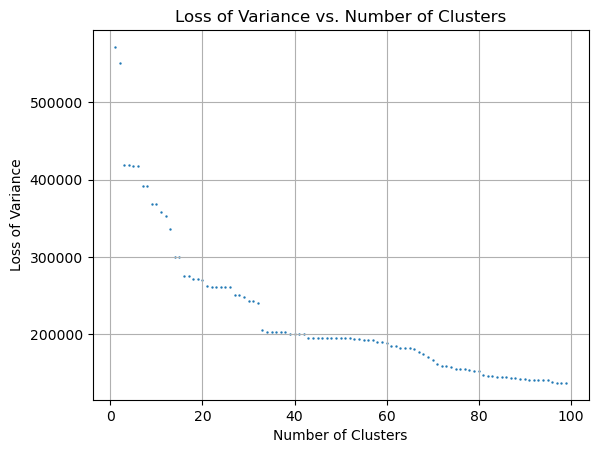

In [30]:

from sklearn.metrics import pairwise_distances

# Function to calculate the loss of variance
def calculate_loss_of_variance(clusters, data):
    loss = 0
    for cluster_id in np.unique(clusters):
        cluster_data = data.loc[clusters == cluster_id, data.columns != 'Cluster']
        centroid = cluster_data.mean(axis=0)
        cluster_loss = np.sum(pairwise_distances(cluster_data, [centroid])**2)
        loss += cluster_loss
    return loss

# Perform agglomerative clustering
n_clusters_range = range(1, 100)  # Define a range of cluster numbers to try
losses = []
num_clusters_left = []

for n_clusters in n_clusters_range:
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = clustering.fit_predict(centroids.iloc[:,1:])
    loss = calculate_loss_of_variance(clusters, centroids)
    losses.append(loss)
    num_clusters_left.append(n_clusters)

    # print(f"After merging to {n_clusters} clusters, loss of variance: {loss}")

# Plotting loss of variance after every merge
plt.scatter(num_clusters_left, losses, marker='o', s=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Loss of Variance')
plt.title('Loss of Variance vs. Number of Clusters')
plt.grid(True)
plt.savefig(f'{data_path}plots/{group}/Loss_var__clusno.png', bbox_inches='tight', dpi=300)

plt.show()
# Significant drops in variance occur at merging to 59, 40, 29


In [31]:
# Agglomerate to 29 communities 
average_neighbours27= agglomerative_clustering(range(2,centroids.cluster.max()), centroids, centroid_noclus, 27)
# # Agglomerate to 40 communities 
average_neighbours33 = agglomerative_clustering(range(2,centroids.cluster.max()), centroids, centroid_noclus, 33)
# Agglomerate to 59 communities 
average_neighbours72 = agglomerative_clustering(range(2,centroids.cluster.max()), centroids, centroid_noclus, 72)

average_neighbours72

['cluster', 'DCs', 'Endothelium_thy1_high', 'Endothelium_thy1_low', 'Fibroblasts', 'Macrophage_CD68', 'Macrophage_F480', 'Neutrophils', 'Tcell_CD8', 'Treg', 'Tumour', 'Undefined', 'cDC1_DCs', 'agglomerateto_27']
dataset saved
['cluster', 'DCs', 'Endothelium_thy1_high', 'Endothelium_thy1_low', 'Fibroblasts', 'Macrophage_CD68', 'Macrophage_F480', 'Neutrophils', 'Tcell_CD8', 'Treg', 'Tumour', 'Undefined', 'cDC1_DCs', 'agglomerateto_33']
dataset saved
['cluster', 'DCs', 'Endothelium_thy1_high', 'Endothelium_thy1_low', 'Fibroblasts', 'Macrophage_CD68', 'Macrophage_F480', 'Neutrophils', 'Tcell_CD8', 'Treg', 'Tumour', 'Undefined', 'cDC1_DCs', 'agglomerateto_72']
dataset saved


,cluster,DCs,Endothelium_thy1_high,Endothelium_thy1_low,Fibroblasts,Macrophage_CD68,Macrophage_F480,Neutrophils,Tcell_CD8,Treg,Tumour,Undefined,cDC1_DCs,agglomerateto_72
0,1,0.000327,0.397831,0.000942,0.001199,0.000000,0.000147,0.001172,0.001796,0.000549,0.594051,0.001621,0.000365,48
1,2,0.000787,0.874997,0.000359,0.000398,0.000028,0.000982,0.000315,0.000074,0.000767,0.119214,0.000069,0.002009,37
2,3,0.012131,0.390473,0.033333,0.009539,0.233964,0.016561,0.013916,0.019309,0.052281,0.207832,0.007516,0.003145,40
3,4,0.000887,0.594872,0.001236,0.009595,0.004031,0.001248,0.003240,0.024010,0.001236,0.356727,0.001065,0.001852,50
4,5,0.000012,0.999955,0.000000,0.000000,0.000000,0.000011,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,186,0.000099,0.000424,0.000424,0.000157,0.000041,0.000085,0.890459,0.000000,0.000169,0.107346,0.000620,0.000175,14
186,187,0.000368,0.000876,0.000000,0.000846,0.000000,0.000000,0.931079,0.000000,0.000222,0.066573,0.000036,0.000000,30
187,188,0.000233,0.000534,0.000000,0.000075,0.000301,0.000000,0.945384,0.000000,0.000000,0.053473,0.000000,0.000000,30
188,189,0.000063,0.000000,0.000077,0.000031,0.000000,0.000000,0.957288,0.000030,0.000000,0.042436,0.000000,0.000074,30


In [32]:
data_wt

,Unique_ROI_ID,source_ID,source_cluster,DCs,Endothelium_thy1_high,Endothelium_thy1_low,Fibroblasts,Macrophage_CD68,Macrophage_F480,Neutrophils,Tcell_CD8,Treg,Tumour,Undefined,cDC1_DCs,cluster
1,MOC2_CCR2KO_1B_3_11,1,Endothelium_thy1_high,0.0,0.400000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.0,0.0,1
2,MOC2_CCR2KO_1B_3_11,2,Endothelium_thy1_high,0.0,0.909091,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.090909,0.0,0.0,2
3,MOC2_CCR2KO_1B_3_11,3,Endothelium_thy1_high,0.0,0.800000,0.0,0.0,0.200000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,3
4,MOC2_CCR2KO_1B_3_11,4,Endothelium_thy1_high,0.0,0.750000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.250000,0.0,0.0,4
5,MOC2_CCR2KO_1B_3_11,5,Endothelium_thy1_high,0.0,0.416667,0.0,0.0,0.083333,0.0,0.083333,0.166667,0.0,0.250000,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348807,MOC2_CCR2KO_NM_1_16,80728,Tumour,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.0,30
348808,MOC2_CCR2KO_NM_1_16,80729,Tumour,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.0,30
348809,MOC2_CCR2KO_NM_1_16,80730,Macrophage_CD68,0.0,0.000000,0.0,0.0,0.111111,0.0,0.000000,0.000000,0.0,0.888889,0.0,0.0,132
348810,MOC2_CCR2KO_NM_1_16,80731,Tumour,0.0,0.000000,0.0,0.0,0.500000,0.0,0.000000,0.000000,0.0,0.500000,0.0,0.0,14


In [33]:
# Annotate entire dataset with clusters after specific clustering k
# Set df
df_cl = average_neighbours72
num_clus = df_cl.iloc[:,-1].max()
key = df_cl[['cluster', f'agglomerateto_{num_clus}']]
merged_df = pd.merge(data_wt, key, on='cluster', how='inner').drop(columns=['cluster', 'source_ID', 'Unique_ROI_ID'])
merged_df.rename(columns={f'agglomerateto_{num_clus}': f'cluster{num_clus}'}, inplace=True)
merged_df

,source_cluster,DCs,Endothelium_thy1_high,Endothelium_thy1_low,Fibroblasts,Macrophage_CD68,Macrophage_F480,Neutrophils,Tcell_CD8,Treg,Tumour,Undefined,cDC1_DCs,cluster72
0,Endothelium_thy1_high,0.0,0.400000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.600000,0.0,0.0,48
1,Endothelium_thy1_high,0.0,0.428571,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.571429,0.0,0.0,48
2,Tumour,0.0,0.400000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.600000,0.0,0.0,48
3,Endothelium_thy1_high,0.0,0.333333,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.666667,0.0,0.0,48
4,Tumour,0.0,0.416667,0.083333,0.0,0.0,0.0,0.00,0.0,0.0,0.500000,0.0,0.0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348806,Neutrophils,0.0,0.000000,0.000000,0.0,0.0,0.0,0.95,0.0,0.0,0.050000,0.0,0.0,30
348807,Neutrophils,0.0,0.000000,0.000000,0.0,0.0,0.0,0.95,0.0,0.0,0.050000,0.0,0.0,30
348808,Neutrophils,0.0,0.000000,0.000000,0.0,0.0,0.0,0.95,0.0,0.0,0.050000,0.0,0.0,30
348809,Neutrophils,0.0,0.000000,0.000000,0.0,0.0,0.0,0.95,0.0,0.0,0.050000,0.0,0.0,30


<Figure size 2000x1000 with 0 Axes>

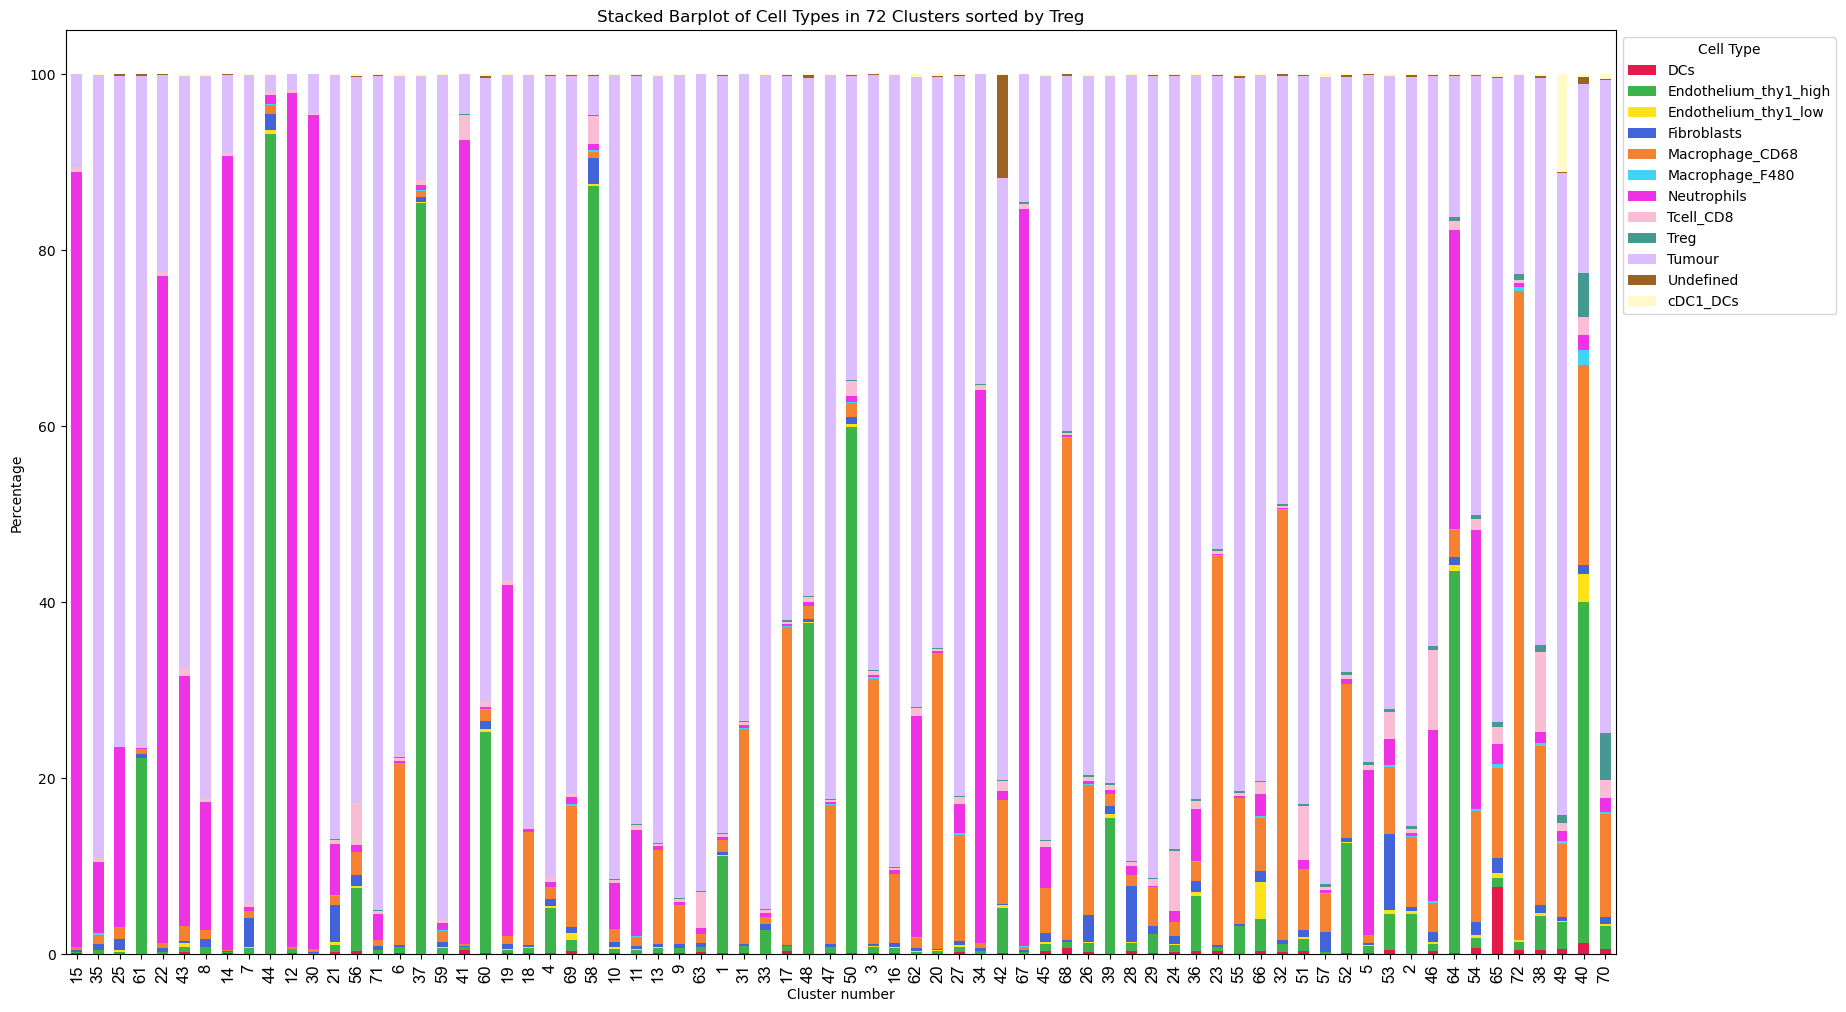

In [34]:
sort_celltype = 'Treg'

# Grouping by 'cluster' and 'celltype' and getting counts
result = merged_df.groupby([f'cluster{num_clus}', 'source_cluster']).size().reset_index(name='Count')

# Pivot the table to get totals per cluster and cell type
result = result.pivot_table(index='source_cluster', columns=f'cluster{num_clus}', values='Count', fill_value=0)
# Sort by dendrogram
# result = result[clus_order]

# Add totals for each cell type and each cluster
result['Total_Cell_Type'] = result.sum(axis=1)
result.loc['Total_Cells'] = result.sum()

result_percentage = result.iloc[:,:-1].div(result.loc['Total_Cells'], axis=1) * 100

# Sort the columns based on the values in the selected row
sorted_columns = result_percentage.columns[result_percentage.loc[sort_celltype].argsort()]

# Reorder the DataFrame based on the sorted columns
result_percentage = result_percentage[sorted_columns]


# Plotting
plt.figure(figsize=(20, 10))

ax = result_percentage.iloc[:-1,:-1].T.plot(kind='bar', stacked=True, figsize=(20, 12),width=0.5, color=colors)
ax.set_ylabel('Percentage')
ax.set_xlabel('Cluster number')
ax.set_title(f'Stacked Barplot of Cell Types in {num_clus} Clusters sorted by {sort_celltype}')
# plt.xticks(fontsize=3)
plt.xticks(fontsize=12, fontfamily='Arial', fontweight='normal')

# # Annotate total amount of cells above each bar
# for i, total in enumerate(result.loc['Total_Cells'][:-1]):  # Exclude the 'Total_Cells' row
#     ax.annotate(f'{total}', (i, 100), xytext=(0, 5), textcoords='offset points', ha='center', rotation=90, fontsize=3)

# Show plot
plt.legend(title='Cell Type', bbox_to_anchor=(1, 1))

plt.savefig(f'{data_path}plots/{group}/stacked_barplot_clusno_{num_clus}_sorted_{sort_celltype}.png', bbox_inches='tight', dpi=300)

plt.show()

In [35]:
# Annotate entire dataset with clusters after specific clustering k
# Set df
df_cl = average_neighbours33
num_clus = df_cl.iloc[:,-1].max()
key = df_cl[['cluster', f'agglomerateto_{num_clus}']]
merged_df = pd.merge(data_wt, key, on='cluster', how='inner').drop(columns=['cluster', 'source_ID', 'Unique_ROI_ID'])
merged_df.rename(columns={f'agglomerateto_{num_clus}': f'cluster{num_clus}'}, inplace=True)
merged_df

,source_cluster,DCs,Endothelium_thy1_high,Endothelium_thy1_low,Fibroblasts,Macrophage_CD68,Macrophage_F480,Neutrophils,Tcell_CD8,Treg,Tumour,Undefined,cDC1_DCs,cluster33
0,Endothelium_thy1_high,0.0,0.400000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.600000,0.0,0.0,24
1,Endothelium_thy1_high,0.0,0.428571,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.571429,0.0,0.0,24
2,Tumour,0.0,0.400000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.600000,0.0,0.0,24
3,Endothelium_thy1_high,0.0,0.333333,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.666667,0.0,0.0,24
4,Tumour,0.0,0.416667,0.083333,0.0,0.0,0.0,0.00,0.0,0.0,0.500000,0.0,0.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348806,Neutrophils,0.0,0.000000,0.000000,0.0,0.0,0.0,0.95,0.0,0.0,0.050000,0.0,0.0,7
348807,Neutrophils,0.0,0.000000,0.000000,0.0,0.0,0.0,0.95,0.0,0.0,0.050000,0.0,0.0,7
348808,Neutrophils,0.0,0.000000,0.000000,0.0,0.0,0.0,0.95,0.0,0.0,0.050000,0.0,0.0,7
348809,Neutrophils,0.0,0.000000,0.000000,0.0,0.0,0.0,0.95,0.0,0.0,0.050000,0.0,0.0,7


<Figure size 2000x1000 with 0 Axes>

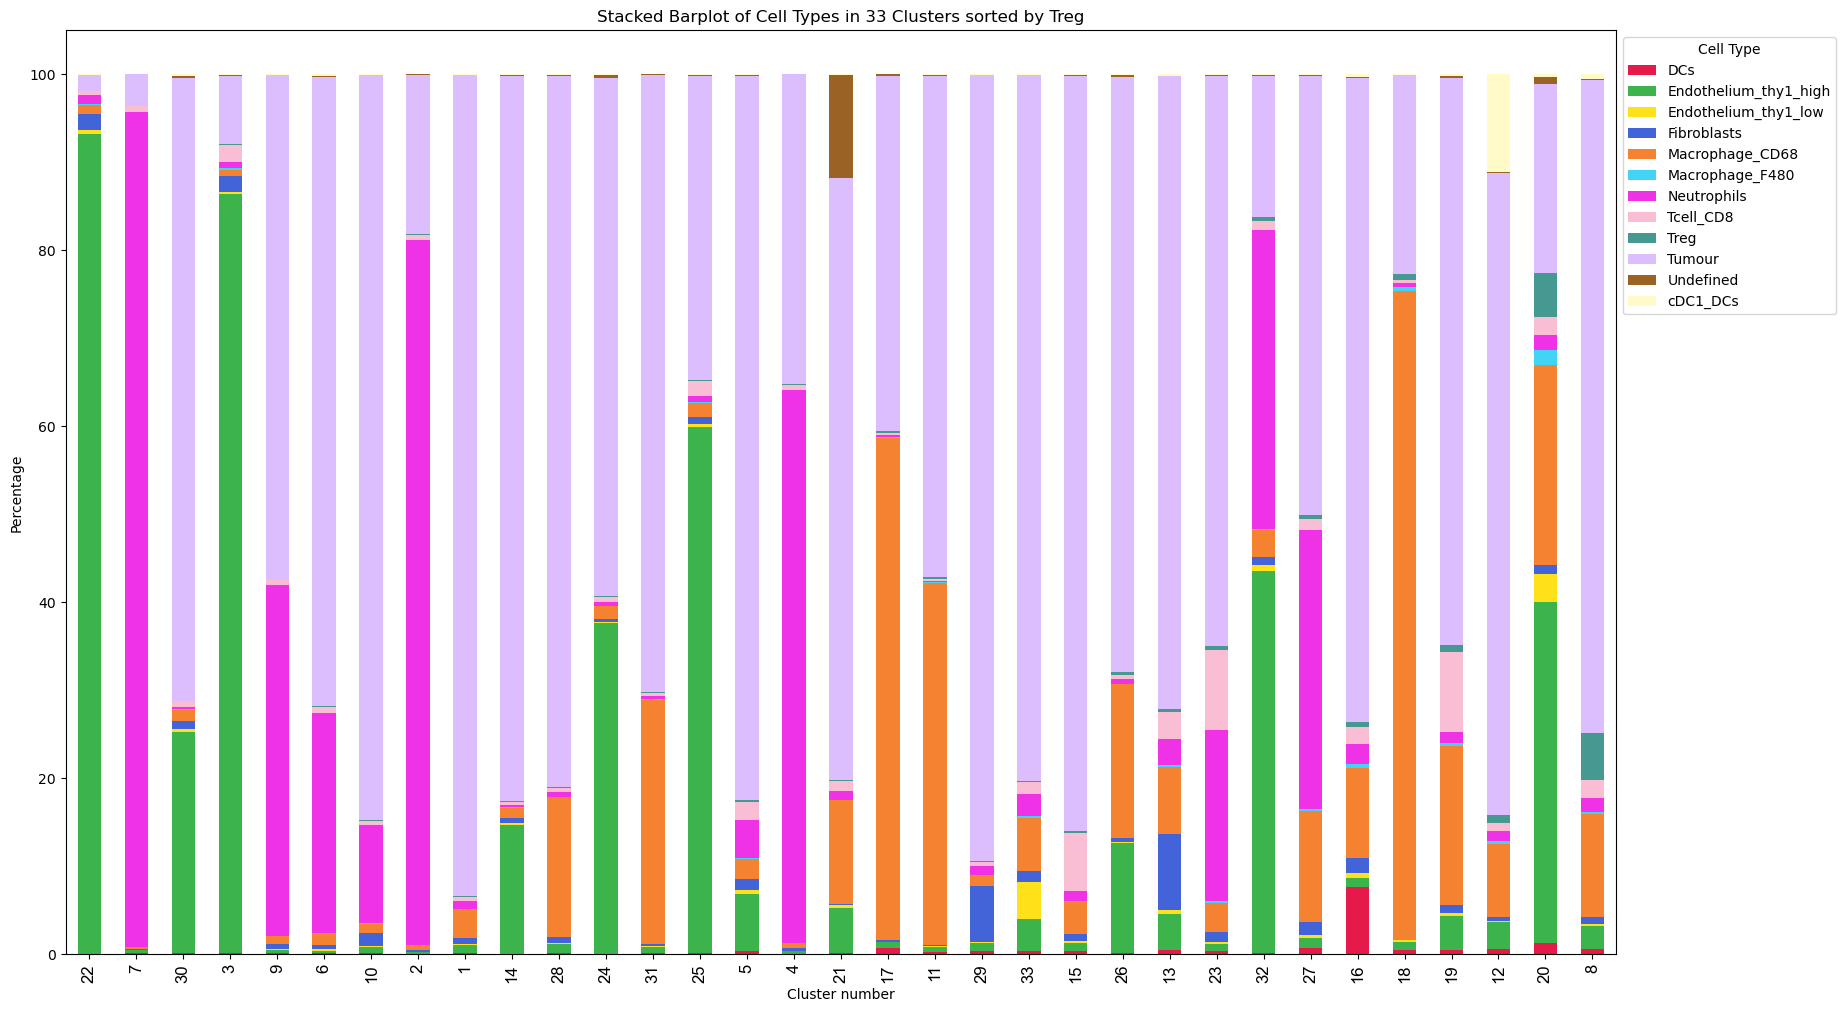

In [36]:
sort_celltype = 'Treg'

# Grouping by 'cluster' and 'celltype' and getting counts
result = merged_df.groupby([f'cluster{num_clus}', 'source_cluster']).size().reset_index(name='Count')

# Pivot the table to get totals per cluster and cell type
result = result.pivot_table(index='source_cluster', columns=f'cluster{num_clus}', values='Count', fill_value=0)
# Sort by dendrogram
# result = result[clus_order]

# Add totals for each cell type and each cluster
result['Total_Cell_Type'] = result.sum(axis=1)
result.loc['Total_Cells'] = result.sum()

result_percentage = result.iloc[:,:-1].div(result.loc['Total_Cells'], axis=1) * 100

# Sort the columns based on the values in the selected row
sorted_columns = result_percentage.columns[result_percentage.loc[sort_celltype].argsort()]

# Reorder the DataFrame based on the sorted columns
result_percentage = result_percentage[sorted_columns]


# Plotting
plt.figure(figsize=(20, 10))

ax = result_percentage.iloc[:-1,:-1].T.plot(kind='bar', stacked=True, figsize=(20, 12),width=0.5, color=colors)
ax.set_ylabel('Percentage')
ax.set_xlabel('Cluster number')
ax.set_title(f'Stacked Barplot of Cell Types in {num_clus} Clusters sorted by {sort_celltype}')
# plt.xticks(fontsize=3)
plt.xticks(fontsize=12, fontfamily='Arial', fontweight='normal')

# # Annotate total amount of cells above each bar
# for i, total in enumerate(result.loc['Total_Cells'][:-1]):  # Exclude the 'Total_Cells' row
#     ax.annotate(f'{total}', (i, 100), xytext=(0, 5), textcoords='offset points', ha='center', rotation=90, fontsize=3)

# Show plot
plt.legend(title='Cell Type', bbox_to_anchor=(1, 1))

plt.savefig(f'{data_path}plots/{group}/stacked_barplot_clusno_{num_clus}_sorted_{sort_celltype}.png', bbox_inches='tight', dpi=300)

plt.show()

In [37]:
# Annotate entire dataset with clusters after specific clustering k
# Set df
df_cl = average_neighbours27
num_clus = df_cl.iloc[:,-1].max()
key = df_cl[['cluster', f'agglomerateto_{num_clus}']]
merged_df = pd.merge(data_wt, key, on='cluster', how='inner').drop(columns=['cluster', 'source_ID', 'Unique_ROI_ID'])
merged_df.rename(columns={f'agglomerateto_{num_clus}': f'cluster{num_clus}'}, inplace=True)
merged_df

,source_cluster,DCs,Endothelium_thy1_high,Endothelium_thy1_low,Fibroblasts,Macrophage_CD68,Macrophage_F480,Neutrophils,Tcell_CD8,Treg,Tumour,Undefined,cDC1_DCs,cluster27
0,Endothelium_thy1_high,0.0,0.400000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.600000,0.0,0.0,24
1,Endothelium_thy1_high,0.0,0.428571,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.571429,0.0,0.0,24
2,Tumour,0.0,0.400000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.600000,0.0,0.0,24
3,Endothelium_thy1_high,0.0,0.333333,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.666667,0.0,0.0,24
4,Tumour,0.0,0.416667,0.083333,0.0,0.0,0.0,0.00,0.0,0.0,0.500000,0.0,0.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348806,Neutrophils,0.0,0.000000,0.000000,0.0,0.0,0.0,0.95,0.0,0.0,0.050000,0.0,0.0,14
348807,Neutrophils,0.0,0.000000,0.000000,0.0,0.0,0.0,0.95,0.0,0.0,0.050000,0.0,0.0,14
348808,Neutrophils,0.0,0.000000,0.000000,0.0,0.0,0.0,0.95,0.0,0.0,0.050000,0.0,0.0,14
348809,Neutrophils,0.0,0.000000,0.000000,0.0,0.0,0.0,0.95,0.0,0.0,0.050000,0.0,0.0,14


<Figure size 2000x1000 with 0 Axes>

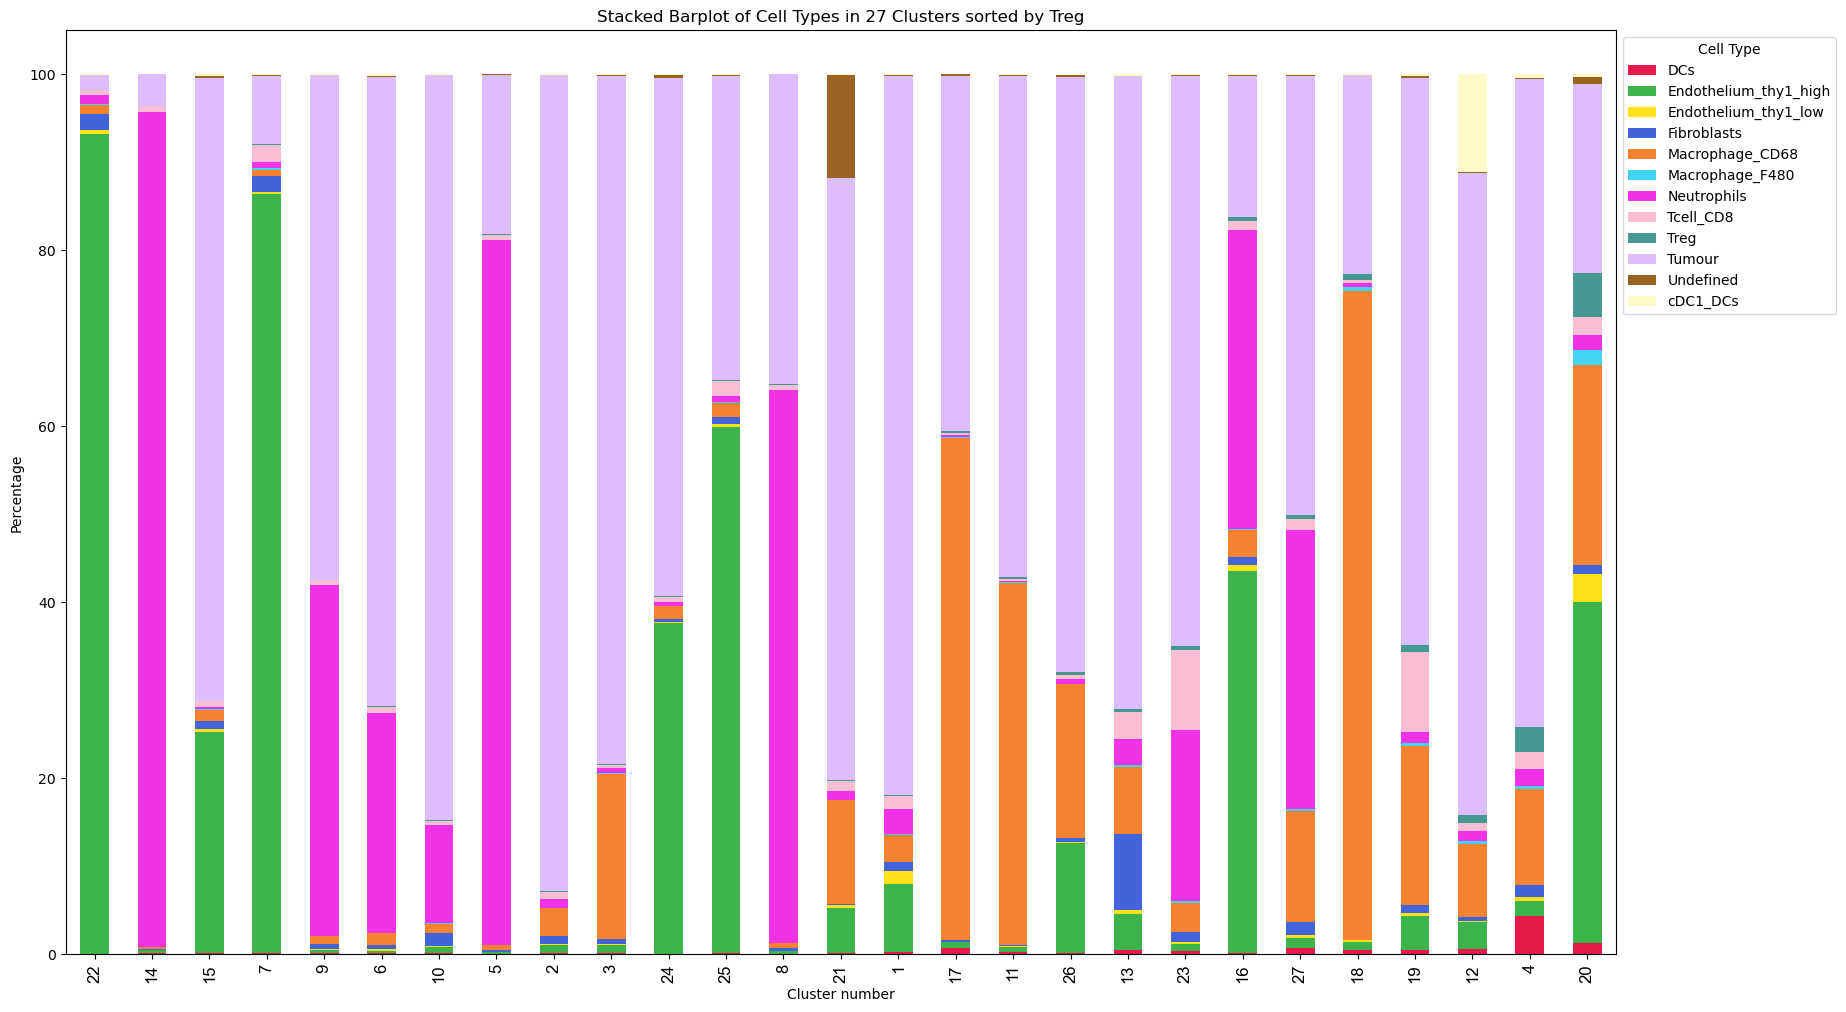

In [38]:
sort_celltype = 'Treg'

# Grouping by 'cluster' and 'celltype' and getting counts
result = merged_df.groupby([f'cluster{num_clus}', 'source_cluster']).size().reset_index(name='Count')

# Pivot the table to get totals per cluster and cell type
result = result.pivot_table(index='source_cluster', columns=f'cluster{num_clus}', values='Count', fill_value=0)
# Sort by dendrogram
# result = result[clus_order]

# Add totals for each cell type and each cluster
result['Total_Cell_Type'] = result.sum(axis=1)
result.loc['Total_Cells'] = result.sum()

result_percentage = result.iloc[:,:-1].div(result.loc['Total_Cells'], axis=1) * 100

# Sort the columns based on the values in the selected row
sorted_columns = result_percentage.columns[result_percentage.loc[sort_celltype].argsort()]

# Reorder the DataFrame based on the sorted columns
result_percentage = result_percentage[sorted_columns]


# Plotting
plt.figure(figsize=(20, 10))

ax = result_percentage.iloc[:-1,:-1].T.plot(kind='bar', stacked=True, figsize=(20, 12),width=0.5, color=colors)
ax.set_ylabel('Percentage')
ax.set_xlabel('Cluster number')
ax.set_title(f'Stacked Barplot of Cell Types in {num_clus} Clusters sorted by {sort_celltype}')
# plt.xticks(fontsize=3)
plt.xticks(fontsize=12, fontfamily='Arial', fontweight='normal')

# # Annotate total amount of cells above each bar
# for i, total in enumerate(result.loc['Total_Cells'][:-1]):  # Exclude the 'Total_Cells' row
#     ax.annotate(f'{total}', (i, 100), xytext=(0, 5), textcoords='offset points', ha='center', rotation=90, fontsize=3)

# Show plot
plt.legend(title='Cell Type', bbox_to_anchor=(1, 1))

plt.savefig(f'{data_path}plots/{group}/stacked_barplot_clusno_{num_clus}_sorted_{sort_celltype}.png', bbox_inches='tight', dpi=300)

plt.show()

In [39]:
data_wt

,Unique_ROI_ID,source_ID,source_cluster,DCs,Endothelium_thy1_high,Endothelium_thy1_low,Fibroblasts,Macrophage_CD68,Macrophage_F480,Neutrophils,Tcell_CD8,Treg,Tumour,Undefined,cDC1_DCs,cluster
1,MOC2_CCR2KO_1B_3_11,1,Endothelium_thy1_high,0.0,0.400000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.0,0.0,1
2,MOC2_CCR2KO_1B_3_11,2,Endothelium_thy1_high,0.0,0.909091,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.090909,0.0,0.0,2
3,MOC2_CCR2KO_1B_3_11,3,Endothelium_thy1_high,0.0,0.800000,0.0,0.0,0.200000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,3
4,MOC2_CCR2KO_1B_3_11,4,Endothelium_thy1_high,0.0,0.750000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.250000,0.0,0.0,4
5,MOC2_CCR2KO_1B_3_11,5,Endothelium_thy1_high,0.0,0.416667,0.0,0.0,0.083333,0.0,0.083333,0.166667,0.0,0.250000,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348807,MOC2_CCR2KO_NM_1_16,80728,Tumour,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.0,30
348808,MOC2_CCR2KO_NM_1_16,80729,Tumour,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.0,30
348809,MOC2_CCR2KO_NM_1_16,80730,Macrophage_CD68,0.0,0.000000,0.0,0.0,0.111111,0.0,0.000000,0.000000,0.0,0.888889,0.0,0.0,132
348810,MOC2_CCR2KO_NM_1_16,80731,Tumour,0.0,0.000000,0.0,0.0,0.500000,0.0,0.000000,0.000000,0.0,0.500000,0.0,0.0,14


In [40]:
# num_clus = 29
key = average_neighbours27[['cluster', f'agglomerateto_27']]
df_clus = pd.merge(data_wt, key, on='cluster', how='inner')
# num_clus = 40
key = average_neighbours33[['cluster', f'agglomerateto_33']]
df_clus = pd.merge(df_clus, key, on='cluster', how='inner')
# num_clus = 59
key = average_neighbours72[['cluster', f'agglomerateto_72']]
df_clus = pd.merge(df_clus, key, on='cluster', how='inner')


df_clus.to_csv(f"{data_path}/clustering/full_cd_CRICK_KO_clus_27_33_72.csv", index = False)
df_clus


# 40 conserves many treg communities


,Unique_ROI_ID,source_ID,source_cluster,DCs,Endothelium_thy1_high,Endothelium_thy1_low,Fibroblasts,Macrophage_CD68,Macrophage_F480,Neutrophils,Tcell_CD8,Treg,Tumour,Undefined,cDC1_DCs,cluster,agglomerateto_27,agglomerateto_33,agglomerateto_72
0,MOC2_CCR2KO_1B_3_11,1,Endothelium_thy1_high,0.0,0.400000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.600000,0.0,0.0,1,24,24,48
1,MOC2_CCR2KO_1B_3_11,16,Endothelium_thy1_high,0.0,0.428571,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.571429,0.0,0.0,1,24,24,48
2,MOC2_CCR2KO_1B_3_11,31,Tumour,0.0,0.400000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.600000,0.0,0.0,1,24,24,48
3,MOC2_CCR2KO_1B_3_11,32,Endothelium_thy1_high,0.0,0.333333,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.666667,0.0,0.0,1,24,24,48
4,MOC2_CCR2KO_1B_3_11,59,Tumour,0.0,0.416667,0.083333,0.0,0.0,0.0,0.00,0.0,0.0,0.500000,0.0,0.0,1,24,24,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348806,MOC2_CCR2KO_NM_1_16,63619,Neutrophils,0.0,0.000000,0.000000,0.0,0.0,0.0,0.95,0.0,0.0,0.050000,0.0,0.0,190,14,7,30
348807,MOC2_CCR2KO_NM_1_16,63878,Neutrophils,0.0,0.000000,0.000000,0.0,0.0,0.0,0.95,0.0,0.0,0.050000,0.0,0.0,190,14,7,30
348808,MOC2_CCR2KO_NM_1_16,64189,Neutrophils,0.0,0.000000,0.000000,0.0,0.0,0.0,0.95,0.0,0.0,0.050000,0.0,0.0,190,14,7,30
348809,MOC2_CCR2KO_NM_1_16,65108,Neutrophils,0.0,0.000000,0.000000,0.0,0.0,0.0,0.95,0.0,0.0,0.050000,0.0,0.0,190,14,7,30
